<h1 align="center"><font size="5">SQL Project: E-commerce dataset by Olist (SQLite)</font></h1>
<p align= "center">The dataset searched from Kaggle</p>

## 1. Import Packages

In [1]:
# !pip install google-cloud-bigquery

In [6]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [19]:
# Import packages
import sqlite3
import pandas as pd
from google.cloud import bigquery
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Extract dataset from SQLite

In [10]:
# Connect to SQLite file:
db= r'D:\DATA ANALYST\ProjectManagement\E-commerce\dataset\archive\olist.sqlite'
conn= sqlite3.connect(db)
dict_={}
try:
    ## List all dataset on this database:
    query_tables= "SELECT name FROM sqlite_master WHERE type='table';"
    tables= pd.read_sql_query(query_tables, conn)
    
    ## Store table as csv type:
    output_dir = r"D:\DATA ANALYST\ProjectManagement\E-commerce\dataset"
    os.makedirs(output_dir, exist_ok=True)
    
    ## Create the interation:
    for table_name in tables['name']:
        print(f"Đang xử lý bảng: {table_name}")
        
        ## Read dataset
        df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
        dict_[table_name]= df.shape
        ## Export dataset as csv default
        output_file = os.path.join(output_dir, f"{table_name}.csv")
        df.to_csv(output_file, index=False)
        
        print(f"Dữ liệu đã được lưu vào: {os.path.abspath(output_file)}")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")
finally:
    ## CLose connect
    if conn:
        conn.close()
# Hiển thị thông tin kích thước của các bảng
size_info = pd.DataFrame(list(dict_.items()), columns=['Table Name', 'Shape'])
display(size_info)

Đang xử lý bảng: product_category_name_translation
Dữ liệu đã được lưu vào: D:\DATA ANALYST\ProjectManagement\E-commerce\dataset\product_category_name_translation.csv
Đang xử lý bảng: sellers
Dữ liệu đã được lưu vào: D:\DATA ANALYST\ProjectManagement\E-commerce\dataset\sellers.csv
Đang xử lý bảng: customers
Dữ liệu đã được lưu vào: D:\DATA ANALYST\ProjectManagement\E-commerce\dataset\customers.csv
Đang xử lý bảng: geolocation
Dữ liệu đã được lưu vào: D:\DATA ANALYST\ProjectManagement\E-commerce\dataset\geolocation.csv
Đang xử lý bảng: order_items
Dữ liệu đã được lưu vào: D:\DATA ANALYST\ProjectManagement\E-commerce\dataset\order_items.csv
Đang xử lý bảng: order_payments
Dữ liệu đã được lưu vào: D:\DATA ANALYST\ProjectManagement\E-commerce\dataset\order_payments.csv
Đang xử lý bảng: order_reviews
Dữ liệu đã được lưu vào: D:\DATA ANALYST\ProjectManagement\E-commerce\dataset\order_reviews.csv
Đang xử lý bảng: orders
Dữ liệu đã được lưu vào: D:\DATA ANALYST\ProjectManagement\E-commerce\dat

Table Name         Shape
0   product_category_name_translation       (71, 2)
1                             sellers     (3095, 4)
2                           customers    (99441, 5)
3                         geolocation  (1000163, 5)
4                         order_items   (112650, 7)
5                      order_payments   (103886, 5)
6                       order_reviews    (99224, 7)
7                              orders    (99441, 8)
8                            products    (32951, 9)
9                     leads_qualified     (8000, 4)
10                       leads_closed     (842, 14)

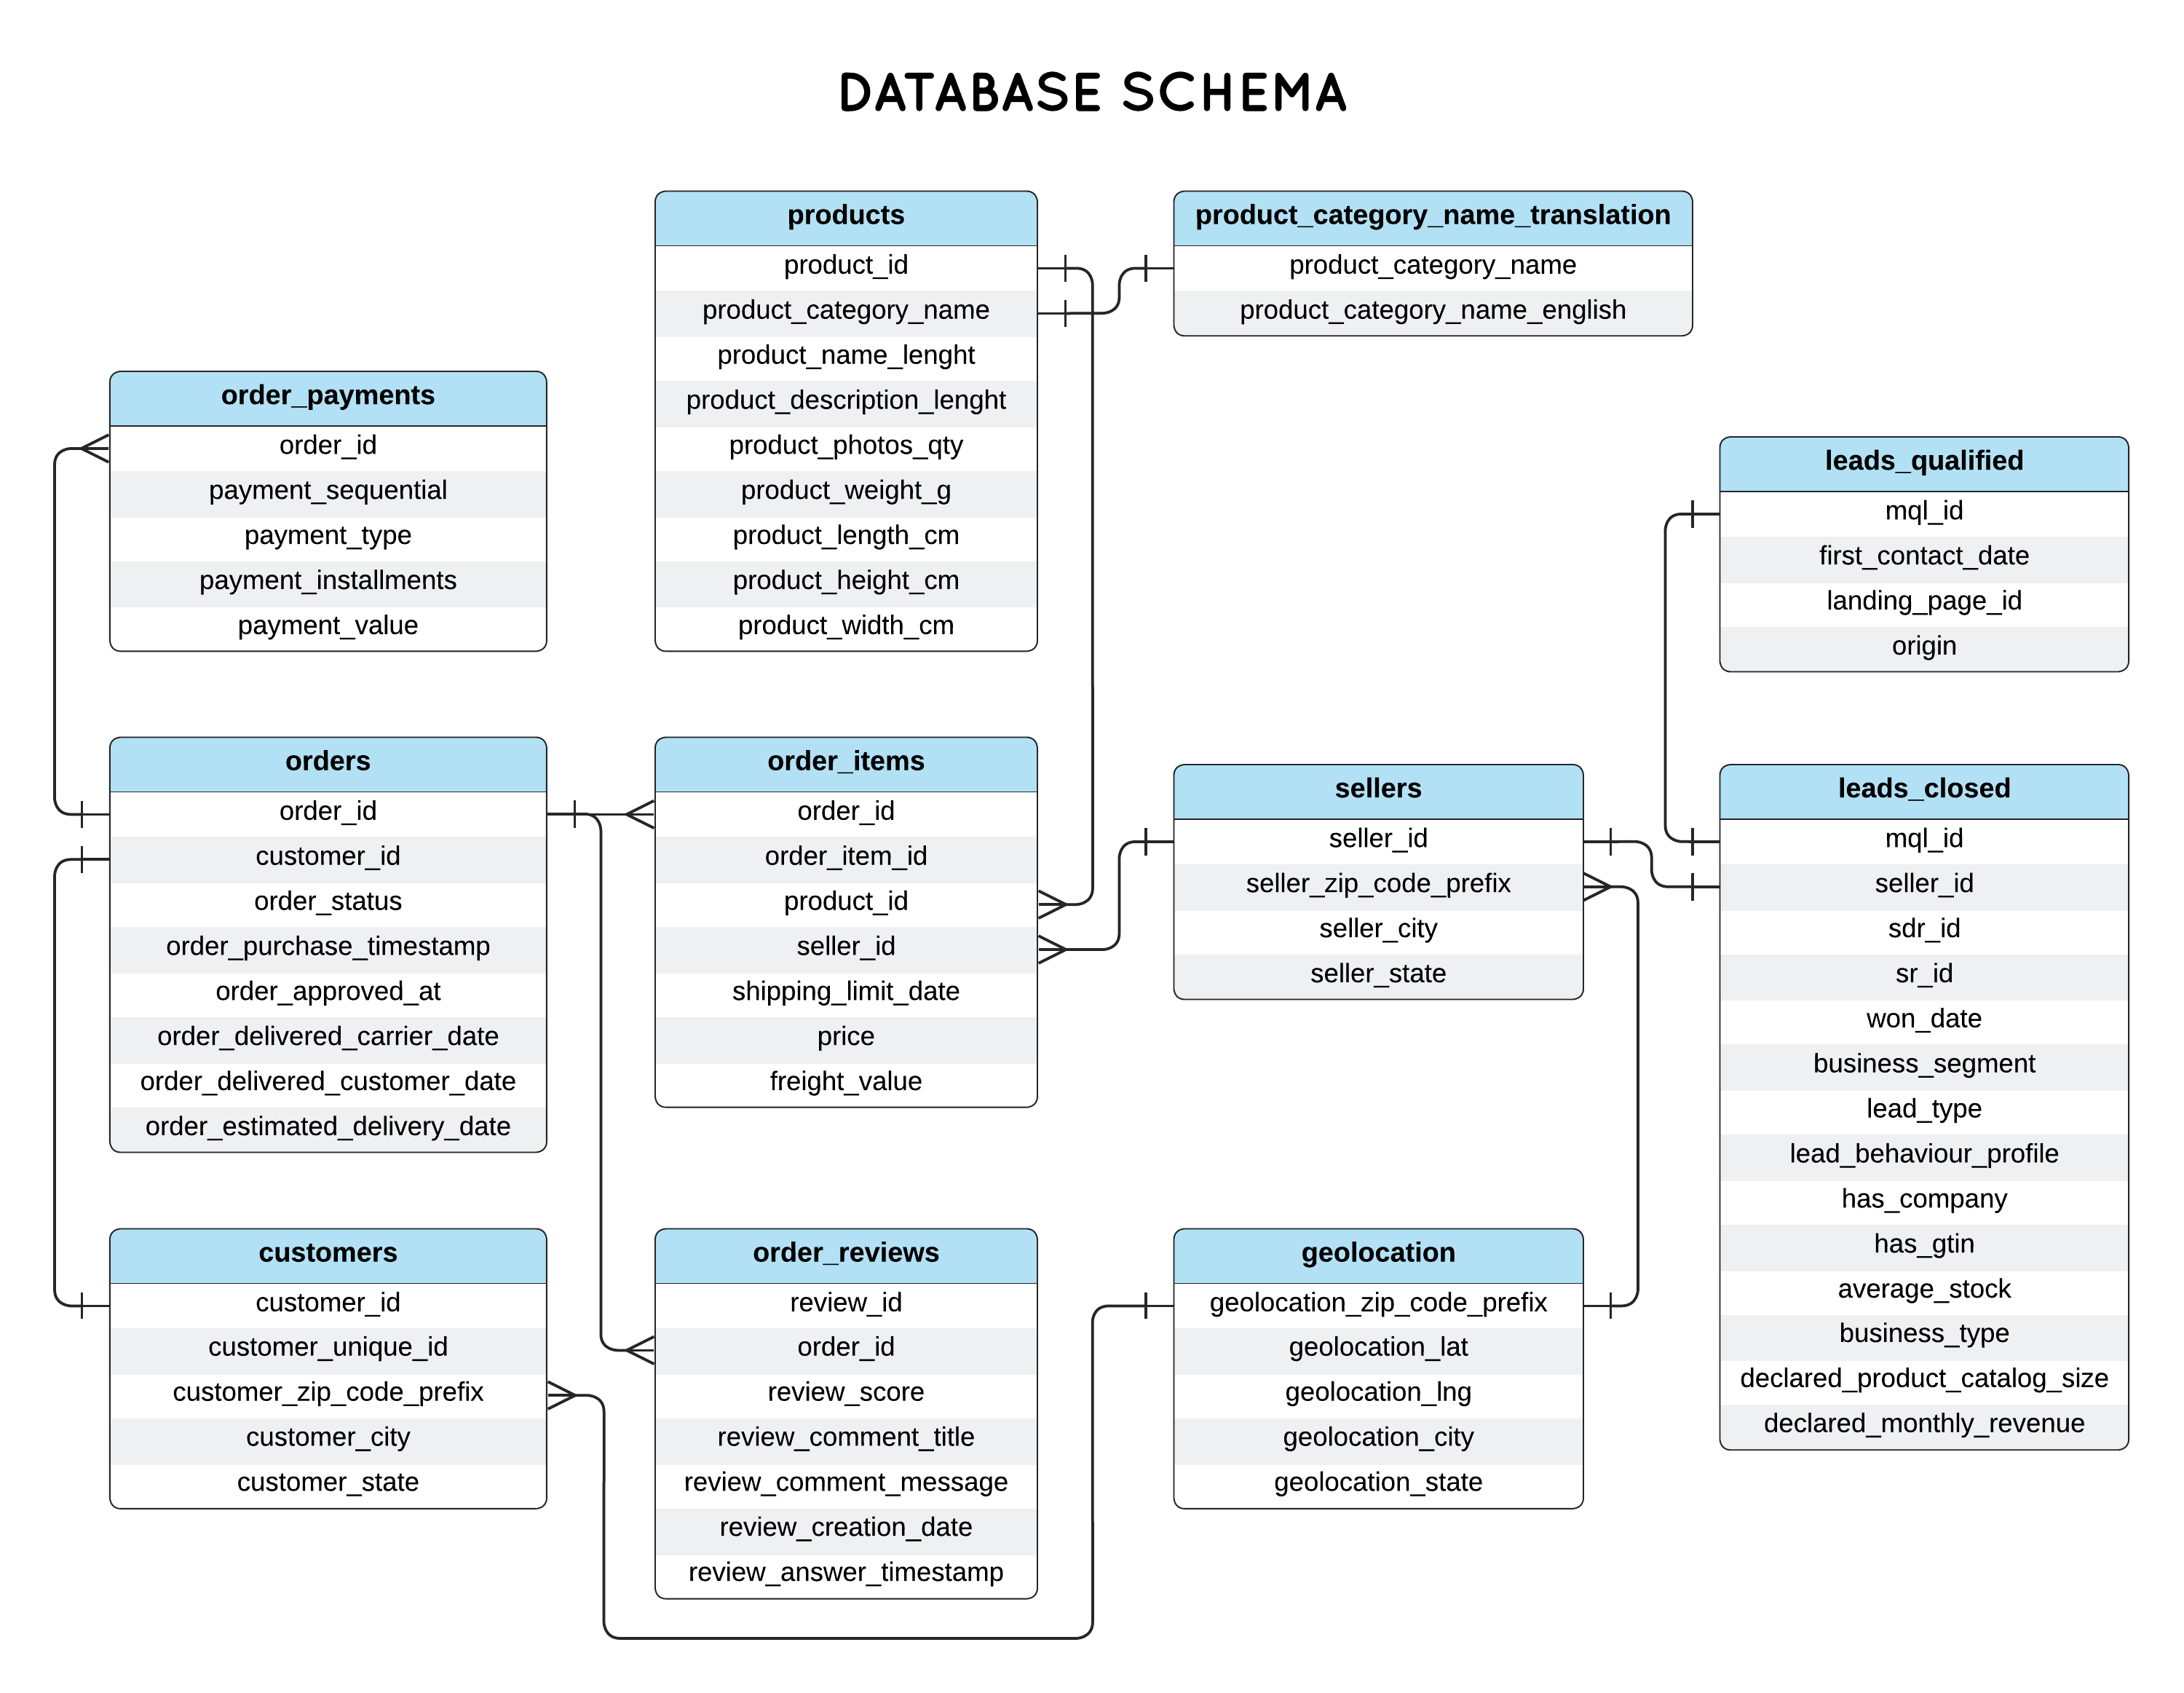

In [8]:
from IPython.display import Image

# Đường dẫn đến hình ảnh trên máy tính
image_path = r"D:\DATA ANALYST\ProjectManagement\E-commerce\dataset\ERD.png"

# Hiển thị hình ảnh
Image(filename=image_path)


In [24]:
conn = sqlite3.connect(db)
df_1= pd.read_sql_query('''
WITH order_day_hour AS (
    SELECT
        strftime('%w', order_purchase_timestamp) AS day_of_week_int,  -- Thứ trong tuần (0=Chủ Nhật, 1=Thứ Hai, ...)
        CASE
            WHEN strftime('%w', order_purchase_timestamp) = '0' THEN 'Sun'
            WHEN strftime('%w', order_purchase_timestamp) = '1' THEN 'Mon'
            WHEN strftime('%w', order_purchase_timestamp) = '2' THEN 'Tue'
            WHEN strftime('%w', order_purchase_timestamp) = '3' THEN 'Wed'
            WHEN strftime('%w', order_purchase_timestamp) = '4' THEN 'Thu'
            WHEN strftime('%w', order_purchase_timestamp) = '5' THEN 'Fri'
            WHEN strftime('%w', order_purchase_timestamp) = '6' THEN 'Sat'
        END AS day_of_week_name, -- Tên của thứ trong tuần
        CAST(strftime('%H', order_purchase_timestamp) AS INT) AS hour  -- Giờ trong ngày (0-23)
    FROM orders
)
SELECT
    order_day_hour.day_of_week_name,
    COUNT(CASE WHEN order_day_hour.hour = 0 THEN 1 END) AS hour_00,
    COUNT(CASE WHEN order_day_hour.hour = 1 THEN 1 END) AS hour_01,
    COUNT(CASE WHEN order_day_hour.hour = 2 THEN 1 END) AS hour_02,
    COUNT(CASE WHEN order_day_hour.hour = 3 THEN 1 END) AS hour_03,
    COUNT(CASE WHEN order_day_hour.hour = 4 THEN 1 END) AS hour_04,
    COUNT(CASE WHEN order_day_hour.hour = 5 THEN 1 END) AS hour_05,
    COUNT(CASE WHEN order_day_hour.hour = 6 THEN 1 END) AS hour_06,
    COUNT(CASE WHEN order_day_hour.hour = 7 THEN 1 END) AS hour_07,
    COUNT(CASE WHEN order_day_hour.hour = 8 THEN 1 END) AS hour_08,
    COUNT(CASE WHEN order_day_hour.hour = 9 THEN 1 END) AS hour_09,
    COUNT(CASE WHEN order_day_hour.hour = 10 THEN 1 END) AS hour_10,
    COUNT(CASE WHEN order_day_hour.hour = 11 THEN 1 END) AS hour_11,
    COUNT(CASE WHEN order_day_hour.hour = 12 THEN 1 END) AS hour_12,
    COUNT(CASE WHEN order_day_hour.hour = 13 THEN 1 END) AS hour_13,
    COUNT(CASE WHEN order_day_hour.hour = 14 THEN 1 END) AS hour_14,
    COUNT(CASE WHEN order_day_hour.hour = 15 THEN 1 END) AS hour_15,
    COUNT(CASE WHEN order_day_hour.hour = 16 THEN 1 END) AS hour_16,
    COUNT(CASE WHEN order_day_hour.hour = 17 THEN 1 END) AS hour_17,
    COUNT(CASE WHEN order_day_hour.hour = 18 THEN 1 END) AS hour_18,
    COUNT(CASE WHEN order_day_hour.hour = 19 THEN 1 END) AS hour_19,
    COUNT(CASE WHEN order_day_hour.hour = 20 THEN 1 END) AS hour_20,
    COUNT(CASE WHEN order_day_hour.hour = 21 THEN 1 END) AS hour_21,
    COUNT(CASE WHEN order_day_hour.hour = 22 THEN 1 END) AS hour_22,
    COUNT(CASE WHEN order_day_hour.hour = 23 THEN 1 END) AS hour_23
FROM order_day_hour
GROUP BY order_day_hour.day_of_week_name, order_day_hour.day_of_week_int
ORDER BY order_day_hour.day_of_week_int;
''',conn)
display(pd.DataFrame(df_1))
conn.close()

day_of_week_name  hour_00  hour_01  hour_02  hour_03  hour_04  hour_05  \
0              Sun      267      141       69       44       27       27   
1              Mon      328      134       66       36       21       22   
2              Tue      306      158       80       28       29       24   
3              Wed      397      179       81       33       33       27   
4              Thu      355      167       75       39       31       28   
5              Fri      426      216       72       49       40       36   
6              Sat      315      175       67       43       25       24   

   hour_06  hour_07  hour_08  ...  hour_14  hour_15  hour_16  hour_17  \
0       34      105      205  ...      684      716      712      797   
1       69      160      479  ...     1096     1079     1094      992   
2       71      223      522  ...     1124     1047     1081      967   
3       93      211      517  ...     1050      983     1040      967   
4       85      220      502  ...      977      928     1077      909   
5       97      206      493  ...      961      979      974      817   
6       53      106      249  ...      677      722      697      701   

   hour_18  hour_19  hour_20  hour_21  hour_22  hour_23  
0      895      899      967      889      873      607  
1      928      945     1027     1118      991      717  
2      877      924      988     1027      965      692  
3      852      848      904      963      878      615  
4      784      826      839      840      857      551  
5      723      784      738      726      702      512  
6      710      756      730      654      550      429  

[7 rows x 25 columns]

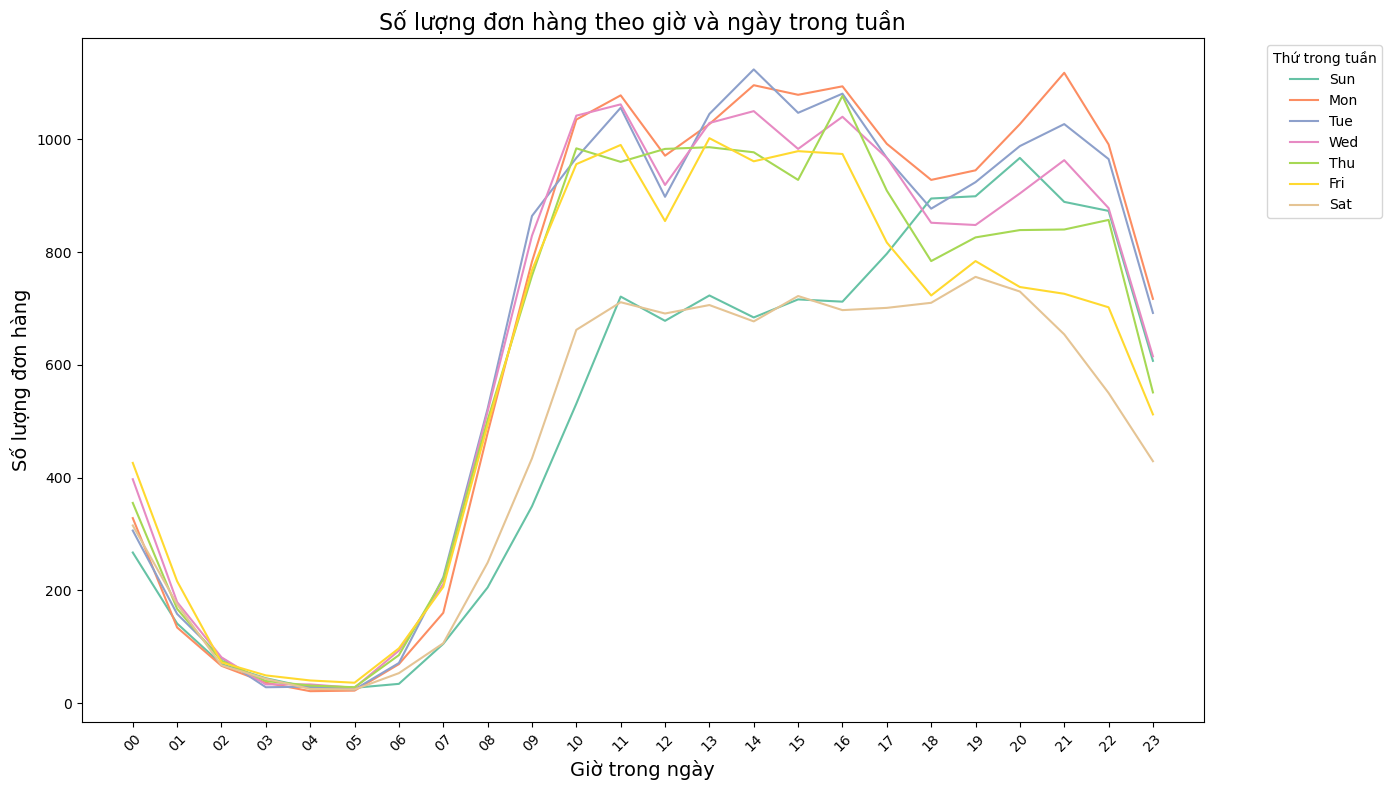

In [26]:
# Chuyển đổi dữ liệu từ dạng cột thành dạng hàng (melt)
df_melted = df_1.melt(id_vars=['day_of_week_name'], 
                    var_name='hour', 
                    value_name='order_count')

# Chuyển đổi "hour_00" -> "00"
df_melted['hour'] = df_melted['hour'].str.replace('hour_', '')

# Vẽ đồ thị
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted, 
            x='hour', 
            y='order_count', 
            hue='day_of_week_name',
            palette='Set2')

# Tùy chỉnh đồ thị
plt.title('Số lượng đơn hàng theo giờ và ngày trong tuần', fontsize=16)
plt.xlabel('Giờ trong ngày', fontsize=14)
plt.ylabel('Số lượng đơn hàng', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Thứ trong tuần', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Hiển thị đồ thị
plt.show()